In [5]:
import os
import yaml
from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from mejiro.analysis import lensing
from mejiro.utils import util

# read configuration file
with open('roman_hlwas_wide.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [6]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

In [7]:
data_dir = os.path.join(config['data_dir'], config['pipeline_dir'], '03')

pickles = sorted(glob(os.path.join(data_dir, 'sca*', 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 1 pickle(s) in /data/bwedig/mejiro/roman_hlwas_wide_dev/03


In [8]:
sample_realization = util.unpickle(pickles[0])
print(sample_realization)

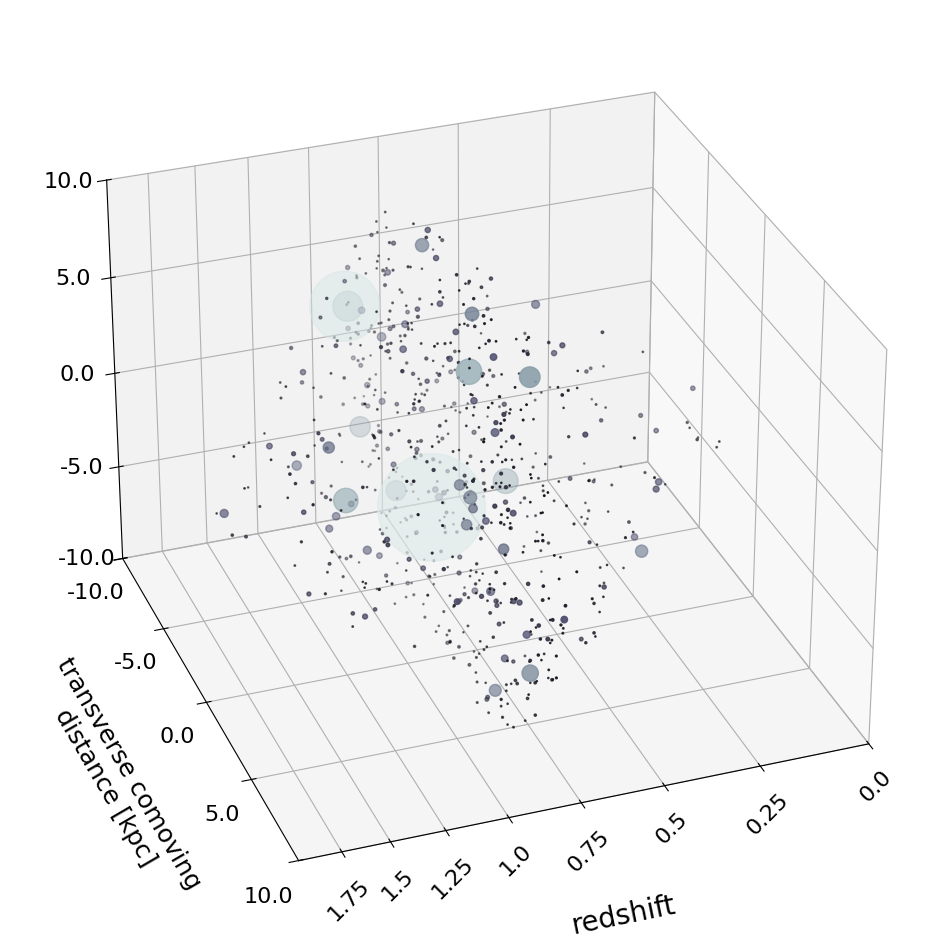

In [9]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
sample_realization.plot(ax)

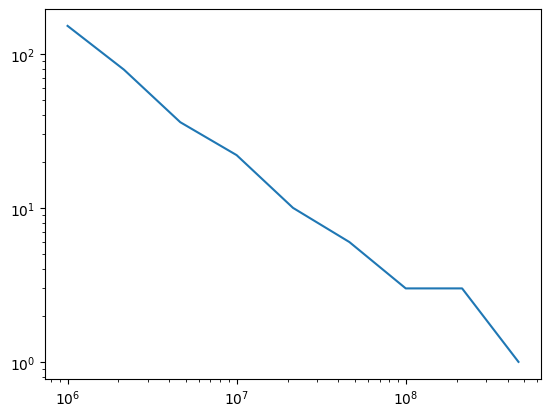

In [10]:
plt.loglog(*lensing.get_subhalo_mass_function(sample_realization))
plt.show()

In [11]:
largest_halo = max(sample_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 7.92e+09 Msun

{'_args': {},
 '_c': 7.820493099413872,
 '_concentration_class': <pyHalo.Halos.concentration.ConcentrationLudlow object at 0x7f0f50d26500>,
 '_kwargs_lenstronomy': [{'Rs': 0.4685537206,
                          'alpha_Rs': 0.00768328,
                          'center_x': 0.0238,
                          'center_y': -0.1083,
                          'r_trunc': 5.817012761323951}],
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f0f50de3eb0>,
 '_nfw_params': [9048155.854991294, 3.7798510473513978, 29.560299032623902],
 '_profile_args': (7.820493099413872, 46.92404978088173),
 '_rescale_norm': 1.0,
 '_rescaled_once': False,
 '_truncation_class': <pyHalo.Halos.tidal_truncation.TruncationRN object at 0x7f0f50d26890>,
 '_zeval': 0.92,
 'fixed_position': False,
 'is_subhalo': False,
 'lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f0f50de3eb0>,
 'mass': 7923831241.04527,
 'mdef': 'TNFW',
 'r3d': None,
 'tnfw_lenstronomy': 